In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import os
path = 'D:\\FILESTEX\\2019_Probabilistic_guarantees_portfolio\\NYSE_2'
os.chdir(path)
fnames=['ahp.csv','alcoa.csv','amerb.csv','coke.csv','dow.csv','dupont.csv',\
        'ford.csv','ge.csv','gm.csv','hp.csv','ibm.csv','inger.csv','jnj.csv','kimbc.csv',\
       'merck.csv','mmm.csv','morris.csv','pandg.csv','schlum.csv']
names=['ahp','alcoa','amerb','coke','dow','dupont','ford','ge','gm','hp','ibm','inger','jnj','kimbc',\
       'merck','mmm','morris','pandg','schlum']
stocks=pd.concat([pd.read_csv(fname,header=None).drop(0,axis=1).rename(columns={1:fname}) for fname in fnames], axis=1)
stocks.columns=names
stocks.head()

,ahp,alcoa,amerb,coke,dow,dupont,ford,ge,gm,hp,ibm,inger,jnj,kimbc,merck,mmm,morris,pandg,schlum
0,1.01515,1.02765,1.04183,1.00637,1.00847,1.01983,1.00000,1.00000,1.01026,1.01935,1.00429,1.01357,0.99683,1.05340,1.03148,1.03377,1.01495,1.00775,1.01176
1,1.01493,1.04036,0.98905,1.00475,1.00840,1.00833,1.00157,1.02187,0.99746,1.01266,0.99573,1.00446,1.00318,1.00461,1.00898,1.00251,1.00000,1.00192,1.01938
2,1.00000,0.97629,0.97786,0.98583,0.99722,0.99449,0.98116,0.97860,0.98219,0.98125,0.98571,0.99556,0.95873,0.98165,0.98043,0.95990,0.97218,0.98656,0.97338
3,1.02451,1.00662,1.02642,1.01917,0.99443,1.00693,1.02720,1.00795,0.98705,1.00637,1.01522,1.00000,1.01325,0.98131,1.01089,1.03655,0.99663,1.00778,1.00000
4,1.03100,0.98465,1.00368,1.00313,1.02801,1.00413,1.04361,1.00394,1.00525,1.03165,1.02427,1.01563,1.00654,1.02381,1.01077,0.99496,0.98649,1.01158,1.01563


In [2]:
stocks.shape

(11178, 19)

In [3]:
N=stocks.shape[0]
d=stocks.shape[1]
r=np.zeros((N,d))
r=stocks.to_numpy()

In [4]:
stocks.apply(np.log).corr()

,ahp,alcoa,amerb,coke,dow,dupont,ford,ge,gm,hp,ibm,inger,jnj,kimbc,merck,mmm,morris,pandg,schlum
ahp,1.000000,0.219248,0.258873,0.339299,0.278589,0.289268,0.256957,0.358211,0.247053,0.235300,0.258679,0.236410,0.389621,0.256734,0.431491,0.316438,0.281480,0.332386,0.232661
alcoa,0.219248,1.000000,0.252616,0.260254,0.429980,0.407519,0.335487,0.378002,0.322186,0.279937,0.310897,0.362632,0.247533,0.252311,0.248300,0.355041,0.241392,0.235986,0.286158
amerb,0.258873,0.252616,1.000000,0.293947,0.282271,0.300477,0.265184,0.328497,0.258314,0.222257,0.239127,0.272025,0.269539,0.253189,0.243256,0.302461,0.342039,0.278571,0.217291
coke,0.339299,0.260254,0.293947,1.000000,0.350238,0.364651,0.303778,0.428572,0.309843,0.275344,0.312802,0.269633,0.394477,0.306578,0.354628,0.389088,0.337595,0.435788,0.266311
dow,0.278589,0.429980,0.282271,0.350238,1.000000,0.524389,0.372021,0.440892,0.380112,0.307291,0.341106,0.398528,0.310500,0.296633,0.299360,0.434690,0.283711,0.319442,0.306805
dupont,0.289268,0.407519,0.300477,0.364651,0.524389,1.000000,0.365317,0.451367,0.391179,0.309210,0.360262,0.375839,0.317372,0.305324,0.313979,0.452503,0.290921,0.347514,0.331467
ford,0.256957,0.335487,0.265184,0.303778,0.372021,0.365317,1.000000,0.421533,0.602715,0.312626,0.343989,0.329160,0.282144,0.245760,0.273349,0.344714,0.255478,0.271835,0.247349
ge,0.358211,0.378002,0.328497,0.428572,0.440892,0.451367,0.421533,1.000000,0.432960,0.387473,0.450930,0.380193,0.405883,0.322860,0.381286,0.457310,0.330034,0.393609,0.318113
gm,0.247053,0.322186,0.258314,0.309843,0.380112,0.391179,0.602715,0.432960,1.000000,0.317878,0.367804,0.337601,0.281715,0.254033,0.271263,0.367157,0.254641,0.278158,0.268061
hp,0.235300,0.279937,0.222257,0.275344,0.307291,0.309210,0.312626,0.387473,0.317878,1.000000,0.441579,0.279304,0.267325,0.197631,0.263892,0.334810,0.245171,0.246845,0.258109


In [5]:
cov=np.cov(np.log(r), rowvar=False)
for i in range(d):
    print(np.vectorize(round)(cov[i,0:d],6))

[2.58e-04 6.60e-05 6.00e-05 8.30e-05 7.50e-05 7.10e-05 7.60e-05 8.70e-05
 6.80e-05 8.60e-05 6.70e-05 6.80e-05 9.60e-05 6.40e-05 1.09e-04 7.40e-05
 7.70e-05 7.60e-05 7.20e-05]
[6.60e-05 3.46e-04 6.80e-05 7.40e-05 1.34e-04 1.16e-04 1.15e-04 1.07e-04
 1.03e-04 1.19e-04 9.30e-05 1.20e-04 7.10e-05 7.30e-05 7.30e-05 9.60e-05
 7.60e-05 6.30e-05 1.02e-04]
[6.00e-05 6.80e-05 2.11e-04 6.50e-05 6.90e-05 6.70e-05 7.10e-05 7.20e-05
 6.40e-05 7.40e-05 5.60e-05 7.10e-05 6.00e-05 5.70e-05 5.60e-05 6.40e-05
 8.40e-05 5.80e-05 6.10e-05]
[8.30e-05 7.40e-05 6.50e-05 2.35e-04 9.00e-05 8.60e-05 8.60e-05 9.90e-05
 8.10e-05 9.60e-05 7.70e-05 7.40e-05 9.30e-05 7.30e-05 8.60e-05 8.60e-05
 8.80e-05 9.50e-05 7.80e-05]
[7.50e-05 1.34e-04 6.90e-05 9.00e-05 2.80e-04 1.35e-04 1.15e-04 1.12e-04
 1.09e-04 1.17e-04 9.20e-05 1.19e-04 8.00e-05 7.70e-05 7.90e-05 1.05e-04
 8.10e-05 7.60e-05 9.80e-05]
[7.10e-05 1.16e-04 6.70e-05 8.60e-05 1.35e-04 2.35e-04 1.03e-04 1.05e-04
 1.03e-04 1.08e-04 8.90e-05 1.03e-04 7.50e-05 7.20e-

In [6]:
#corr=np.corrcoef(np.log(r), rowvar=False)
#for i in range(d):
#    print(np.vectorize(round)(corr[i,0:d],2))

In [7]:
#for i in range(d):
#    for j in range(d):
#        print(cov[i,j]-np.sqrt(cov[i,i])*np.sqrt(cov[j,j])*corr[i,j])

In [8]:
#L = np.linalg.cholesky(cov)
#for i in range(d):
#    print(np.vectorize(round)(L[i,0:d],4))

In [9]:
mu=np.mean(np.log(r),axis=0)
for i in range(d):
    print(i,mu[i])

0 0.00047387072759585546
1 0.00034306595660099485
2 0.0005110836528094719
3 0.0005280394297623968
4 0.000436792778645642
5 0.00032502495852828125
6 0.0003567214279194729
7 0.00047667294462524915
8 0.0002617048409259694
9 0.0005483555275162058
10 0.0003653120960748829
11 0.000413079452992994
12 0.0005933246550213262
13 0.0004799802351001883
14 0.000546094779424721
15 0.0004085709396190517
16 0.0007299668768228498
17 0.00047847225594984836
18 0.0005572075755420864


In [10]:
n_experiments=500
X=np.ones(n_experiments)

In [11]:
w_u=np.ones(d)/d
for s in range(n_experiments):
    X[s]=1
    np.random.seed(1+s)
    r_artif=np.exp(np.random.multivariate_normal(mu,cov,N))
    for t in range(N):
        X[s]=X[s]*np.dot(w_u,r_artif[t,:])
print(X.mean(),np.median(X),X.std(),X.min(),X.max())

862.5063833838084 517.3560582092979 1221.070337454361 16.875746118696288 11418.931973435652


In [12]:
w_o=np.zeros(d)
w_o[9]=0.177
w_o[16]=0.747
w_o[18]=0.076
for s in range(n_experiments):
    y=1
    np.random.seed(1+s)
    r_artif=np.exp(np.random.multivariate_normal(mu,cov,N))
    for t in range(N):
        y=y*np.dot(w_o,r_artif[t,:])
    X[s]=y
print(X.mean(),np.median(X),X.std(),X.min(),X.max())

15262.629581783784 3990.2520292208164 46791.53434175323 8.640607209923221 613552.7782458843


In [13]:
#corr_artif=np.corrcoef(np.log(r_artif), rowvar=False)
#for i in range(d):
#    print(np.vectorize(round)(corr_artif[i,0:d],2))

In [14]:
#cov_artif=np.cov(np.log(r_artif), rowvar=False)
#for i in range(d):
#    print(np.vectorize(round)(cov_artif[i,0:d],6))

In [15]:
#mu_artif=np.mean(np.log(r_artif),axis=0)
#for i in range(d):
#    print(i,mu_artif[i])

In [16]:
def optimal_portfolio_SEG_unif(U,R,n_attempts=10**4,threshold=1/10**10):
    N=R.shape[0]
    d=R.shape[1]
    w_old=np.ones(d)/d
    w_new=np.zeros(d)
    attempt=0
    i=0
    while attempt<=n_attempts:
        i+=1
        k=np.random.randint(0,N)
        eta=np.random.rand()
        a=[w_old[j]*np.exp(eta*R[k,j]/(np.dot(w_old,R[k,:]))**(1-alpha)) for j in range(d)]
        w_new=a/np.sum(a)
        attempt+=1
        if U(w_new,R)>U(w_old,R)+threshold:
            w_old=w_new
            attempt=0
        if i%10000==0: print(s,i,100*w_old,U(w_old,R),eta)
        #print(i,100*w_old,U(w_old,R),eta) 
    return w_old, U(w_old,R), i

In [17]:
def refine(w,tol=1/10**3):
    d=w.shape[0]
    opt_num=[i for i in range(d) if w[i]>tol]
    not_opt_num=[i for i in range(d) if w[i]<=tol]
    w=w[opt_num]/np.sum(w[opt_num])    
    return opt_num, not_opt_num, w

In [18]:
def U(nu,r):
    if alpha==0:
        return np.mean(np.log(np.dot(r[0:N,:],nu)))
    else:
        return np.mean(np.dot(r[0:N,:],nu)**alpha)

In [ ]:
n_realizations=30
n_experiments=10
s=0
alpha=0
opt_portf=np.zeros((n_experiments,d))
opt_portf_best=np.zeros((n_realizations,d))
opt_val=np.zeros(n_experiments)
X=np.ones(n_experiments)
for realization in range(n_realizations):
    np.random.seed(42+realization)
    r_artif=np.exp(np.random.multivariate_normal(mu,cov,N))  
    for s in range(n_experiments): 
        np.random.seed(1000+s)         
        opt_portf[s,:], opt_val[s], _  = optimal_portfolio_SEG_unif(U,r_artif)
    opt_portf_best[realization,:]=opt_portf[np.argmax(opt_val),:]
    print(realization)

0 10000 [3.92098723e-03 2.62096113e-03 1.64902833e+01 6.60197905e+00
 1.31329376e-03 3.10462551e-03 3.74854041e-04 5.40489176e-03
 2.75909001e-04 2.05232887e-04 4.37416239e-04 4.85367484e-03
 1.05572729e-02 3.38121694e+01 4.30125906e+01 1.55869891e-03
 7.88221270e-03 3.94078835e-03 3.65269314e-02] 0.0006465412756027629 0.10502252807031498
0 20000 [1.70786062e-03 1.13259547e-03 1.63867377e+01 6.67860799e+00
 4.99494586e-04 1.24432180e-03 1.64114596e-04 2.07080526e-03
 1.30414647e-04 6.87114643e-05 2.18774361e-04 1.70675232e-03
 4.06627328e-03 3.37895353e+01 4.31046394e+01 7.82499517e-04
 3.00969193e-03 1.46352994e-03 2.22136958e-02] 0.0006465685783713463 0.7681814478326954
0 30000 [1.50377547e-03 9.90672284e-04 1.64604436e+01 6.57892494e+00
 4.39089978e-04 1.03682340e-03 1.43164556e-04 1.72530693e-03
 1.13397623e-04 5.32937075e-05 1.85635338e-04 1.30235387e-03
 3.44030503e-03 3.38373282e+01 4.30867838e+01 6.41211184e-04
 2.61273402e-03 1.22368683e-03 2.11080118e-02] 0.000646571426390803

3 20000 [2.29091131e-03 1.31026276e-03 1.64019164e+01 6.59823547e+00
 7.22183477e-04 8.82661452e-04 1.48346994e-04 2.53790007e-03
 2.34255024e-04 3.44952559e-05 3.95501702e-04 1.09699176e-03
 3.25243751e-03 3.38098540e+01 4.31341860e+01 9.32990400e-04
 3.64362677e-03 1.65592665e-03 3.66696033e-02] 0.0006465669495542399 0.47363093545724466
3 30000 [1.66447155e-03 1.18256659e-03 1.63965102e+01 6.59586524e+00
 5.37937547e-04 6.43459061e-04 1.07529671e-04 1.98966223e-03
 1.88303270e-04 2.44891035e-05 2.98852345e-04 8.18158258e-04
 2.54367277e-03 3.38470910e+01 4.31164009e+01 7.32690782e-04
 2.66613300e-03 1.19441359e-03 2.95402809e-02] 0.000646571784255683 0.84979941973377
3 40000 [1.48902183e-03 1.04104285e-03 1.64198771e+01 6.62672782e+00
 4.87724689e-04 5.78735356e-04 9.85876263e-05 1.77322298e-03
 1.72446351e-04 2.15921206e-05 2.70387683e-04 7.55861465e-04
 2.43064192e-03 3.38247911e+01 4.30890152e+01 6.65930004e-04
 2.45041816e-03 1.12994579e-03 2.62232383e-02] 0.0006465730118906826 0

6 70000 [1.13292650e-03 7.12467349e-04 1.64397759e+01 6.59836896e+00
 3.16762509e-04 6.84041352e-04 1.49989684e-04 1.36743025e-03
 8.55728440e-05 2.48821207e-05 2.10183858e-04 6.86785619e-04
 2.17383471e-03 3.38483990e+01 4.30839930e+01 3.97996441e-04
 1.87082650e-03 1.09585414e-03 1.85535070e-02] 0.0006465754504040626 0.7306596220572831
6 80000 [1.10037731e-03 6.57116517e-04 1.63840093e+01 6.63899132e+00
 3.04333857e-04 6.62411619e-04 1.36139567e-04 1.30077225e-03
 8.16767734e-05 2.28531606e-05 1.98555570e-04 6.56302070e-04
 2.12785881e-03 3.38315272e+01 4.31175656e+01 3.82009767e-04
 1.73511069e-03 1.05628665e-03 1.74847590e-02] 0.000646575944985852 0.6220315422382423
7 10000 [4.47867938e-03 2.64303362e-03 1.63741491e+01 6.57591430e+00
 1.46104726e-03 2.91094139e-03 7.00615042e-04 8.93885930e-03
 3.65042979e-04 2.28052508e-04 7.21332608e-04 2.58030372e-03
 7.82581224e-03 3.38704581e+01 4.30572648e+01 1.76902159e-03
 7.08851692e-03 4.44140318e-03 7.60610238e-02] 0.0006465397814304385 

0 20000 [1.02852713e-03 6.82156594e-05 9.02357275e-04 3.55572229e+01
 7.25117287e-04 2.84656874e-04 1.68387587e-04 4.29882853e-04
 1.90535957e-04 1.92093382e-03 2.58596279e-04 7.80054232e-05
 8.37013302e-04 3.82665717e-04 4.85715009e-04 2.50762219e-04
 5.42094994e-04 8.63780494e-04 6.44333598e+01] 0.0009547907965754453 0.7681814478326954
0 30000 [7.87453181e-04 5.42561912e-05 7.56551019e-04 3.55563152e+01
 5.27964895e-04 1.99015605e-04 1.14165335e-04 3.14896876e-04
 1.27324529e-04 1.43623228e-03 1.90449940e-04 6.15338414e-05
 5.90382540e-04 2.67093386e-04 3.38427257e-04 1.82136826e-04
 3.79526066e-04 5.92416138e-04 6.44367650e+01] 0.0009547930202829885 0.4682610980019224
0 40000 [7.33324198e-04 4.98897913e-05 6.96120435e-04 3.55504834e+01
 4.94750138e-04 1.83855118e-04 1.06235472e-04 2.87588062e-04
 1.17697031e-04 1.32424271e-03 1.74203096e-04 5.70216931e-05
 5.39800187e-04 2.52615356e-04 3.03397867e-04 1.68102129e-04
 3.55109069e-04 5.49283631e-04 6.44431234e+01] 0.0009547934619355205

4 40000 [5.23311532e-04 4.40746175e-05 8.65843091e-04 3.55323342e+01
 3.59653181e-04 1.26224028e-04 1.25465955e-04 3.42904842e-04
 1.83469947e-04 7.59679716e-04 1.19265049e-04 8.47713557e-05
 5.36839046e-04 2.01515217e-04 3.21047434e-04 1.59540080e-04
 7.00517040e-04 6.71517801e-04 6.44615401e+01] 0.0009547933008004604 0.06518566414119198
4 50000 [4.89052137e-04 4.19602410e-05 8.20205991e-04 3.55505835e+01
 3.32411151e-04 1.18606864e-04 1.16329319e-04 3.20089072e-04
 1.70561925e-04 6.90199393e-04 1.09888089e-04 7.91190967e-05
 5.03817693e-04 1.90422400e-04 2.94501571e-04 1.50643308e-04
 6.45601710e-04 6.20767357e-04 6.44437223e+01] 0.0009547936855733172 0.07026047200070795
5 10000 [9.52539340e-04 2.09064442e-04 2.48093826e-03 3.55511419e+01
 1.46446041e-03 4.72948918e-04 2.82243107e-04 1.01940348e-03
 5.80674771e-04 3.62720479e-03 3.27647430e-04 2.66526806e-04
 1.37173096e-03 6.62622172e-04 5.96855897e-04 6.77195744e-04
 1.34529856e-03 1.86124106e-03 6.44306595e+01] 0.00095478331233880

8 50000 [5.98962297e-04 7.81044217e-05 9.45925376e-04 3.55442782e+01
 2.76414888e-04 2.18778644e-04 1.43154728e-04 2.01908480e-04
 1.76521780e-04 2.51788031e-04 1.06834421e-04 9.08328659e-05
 4.23031805e-04 1.95691205e-04 4.10381386e-04 2.19797922e-04
 3.74484435e-04 4.96168642e-04 6.44505131e+01] 0.0009547935990187519 0.5916832776926344
8 60000 [5.66027223e-04 7.44734778e-05 9.19411601e-04 3.55468019e+01
 2.62189892e-04 2.10540692e-04 1.35088203e-04 1.91718421e-04
 1.62537852e-04 2.35940614e-04 1.01458138e-04 8.51531883e-05
 3.99309122e-04 1.88952936e-04 3.93540460e-04 2.12613713e-04
 3.63560959e-04 4.78299733e-04 6.44482173e+01] 0.0009547938219146674 0.5923861694898936
8 70000 [5.50071187e-04 7.10816773e-05 8.64922756e-04 3.55184928e+01
 2.50335781e-04 1.95696212e-04 1.22731627e-04 1.86617533e-04
 1.52356675e-04 2.21763318e-04 9.73688106e-05 8.21689428e-05
 3.93482411e-04 1.74860838e-04 3.81821998e-04 2.00624192e-04
 3.42710853e-04 4.55256686e-04 6.44767634e+01] 0.000954794033534478 

1 70000 [1.03651919e-01 2.26149441e-04 5.65213985e-04 2.50342594e-04
 1.45130224e-04 1.14787195e-04 1.76221141e+01 5.92279343e-04
 6.35490579e-04 4.26438486e+01 1.10474018e-03 1.31260968e-04
 5.42660129e-03 1.07526202e-04 4.32610629e-03 7.73737751e-05
 3.96099912e+01 1.91965448e-04 6.49925239e-03] 0.000812158445850489 0.08723131564284359
1 80000 [1.00974295e-01 2.23346251e-04 5.52026840e-04 2.39182887e-04
 1.39567535e-04 1.10841209e-04 1.76076789e+01 5.75832356e-04
 6.23862693e-04 4.26267525e+01 1.08495220e-03 1.28335215e-04
 5.22836263e-03 1.04084219e-04 4.16450188e-03 7.55227140e-05
 3.96448820e+01 1.85982010e-04 6.27590209e-03] 0.0008121586691359464 0.11645309316308472
1 90000 [9.80977216e-02 1.87932530e-04 4.87690547e-04 2.20976485e-04
 1.31930093e-04 1.00405652e-04 1.75973764e+01 5.36039103e-04
 5.59851418e-04 4.26251131e+01 9.79918227e-04 1.13865009e-04
 4.85094999e-03 9.43728201e-05 3.70841448e-03 6.90177199e-05
 3.96610386e+01 1.78927087e-04 6.15399977e-03] 0.000812159514512718

4 20000 [2.09247423e-01 6.11770265e-04 1.28320278e-03 5.44457266e-04
 3.59155588e-04 2.98950834e-04 1.75640102e+01 2.44300432e-03
 1.67865115e-03 4.26268619e+01 2.94865795e-03 2.59106933e-04
 2.10640666e-02 3.14574504e-04 1.19044591e-02 1.74456247e-04
 3.95208129e+01 5.93256553e-04 3.45898011e-02] 0.0008121416162256935 0.8663553906682477
4 30000 [1.86198890e-01 3.80821716e-04 8.77249652e-04 4.09993639e-04
 2.57970631e-04 2.09624867e-04 1.75571712e+01 1.75767398e-03
 1.21900662e-03 4.26276432e+01 1.92630895e-03 1.79153299e-04
 1.64709063e-02 2.39362063e-04 8.89184056e-03 1.16181665e-04
 3.95713546e+01 4.78337750e-04 2.42177050e-02] 0.00081214940922604 0.899569110253831
4 40000 [1.69873660e-01 2.98937114e-04 7.14326613e-04 3.39796701e-04
 2.07292748e-04 1.61454559e-04 1.75506123e+01 1.32608951e-03
 9.80675502e-04 4.26716728e+01 1.55681140e-03 1.37985499e-04
 1.36428716e-02 2.13971642e-04 7.24542951e-03 9.31377768e-05
 3.95602503e+01 4.22309298e-04 2.02498206e-02] 0.0008121530339369823 0.

7 70000 [2.21641848e-02 1.76321823e-04 4.36256823e-04 2.35155849e-04
 1.26030695e-04 6.28494381e-05 1.76202636e+01 6.56791588e-04
 6.68684735e-04 4.26613881e+01 1.10882524e-03 8.10506914e-05
 1.64873961e-02 9.81241449e-05 4.16877852e-03 1.17082466e-04
 3.96579761e+01 1.27520050e-04 1.36571119e-02] 0.0008121574722996199 0.8067621002029417
7 80000 [1.98185734e-02 1.60113334e-04 4.00547392e-04 2.18681025e-04
 1.17683041e-04 5.95202511e-05 1.76358481e+01 6.02078678e-04
 5.91503796e-04 4.26733925e+01 9.93562194e-04 7.19517381e-05
 1.54649212e-02 9.13468410e-05 3.81165627e-03 1.05352144e-04
 3.96356309e+01 1.18715543e-04 1.25023307e-02] 0.0008121583207095964 0.052700655527146645
7 90000 [1.93728478e-02 1.54168495e-04 3.78334137e-04 2.11332456e-04
 1.16291678e-04 5.85242174e-05 1.76042229e+01 5.91065212e-04
 5.68062804e-04 4.26960291e+01 9.66651953e-04 6.88232883e-05
 1.49820362e-02 8.69615922e-05 3.67970057e-03 1.02059517e-04
 3.96458632e+01 1.15949474e-04 1.24318943e-02] 0.00081215857346932

0 30000 [3.79203107e-04 3.46964738e-04 1.04523434e-03 4.60427831e-04
 1.49892661e-03 3.30257947e-04 6.58941598e+00 4.15879529e-04
 2.28894534e-03 1.50584073e+01 9.37458098e-04 2.10102916e-04
 1.89302517e-03 3.48542705e+01 8.97190158e-03 6.69840115e-04
 4.34760600e+01 1.54066033e-03 8.57386532e-04] 0.0007458777853756624 0.4682610980019224
0 40000 [3.22083011e-04 3.33056392e-04 9.39807478e-04 3.94291195e-04
 1.27849989e-03 2.79369996e-04 6.53303498e+00 3.70775259e-04
 1.86083858e-03 1.50550294e+01 8.31354943e-04 1.76935679e-04
 1.71877322e-03 3.48803154e+01 7.70594334e-03 5.86479450e-04
 4.35126649e+01 1.39467521e-03 7.62545026e-04] 0.0007458804018567014 0.7475861844790866
0 50000 [2.57905965e-04 2.54540968e-04 7.56206869e-04 3.01657529e-04
 9.96032362e-04 2.17753715e-04 6.58523832e+00 2.78885914e-04
 1.42710318e-03 1.50497944e+01 6.35382705e-04 1.26610417e-04
 1.36976193e-03 3.48212205e+01 6.17356557e-03 4.53714218e-04
 4.35287913e+01 1.09582487e-03 6.10407879e-04] 0.0007458844363314402

3 50000 [3.59904676e-04 1.82187200e-04 7.69078851e-04 3.32754173e-04
 1.04108860e-03 2.79169845e-04 6.52995665e+00 4.64653283e-04
 1.72790260e-03 1.50826080e+01 8.16690960e-04 1.76610164e-04
 1.29076245e-03 3.48781227e+01 6.31632975e-03 5.53306189e-04
 4.34933313e+01 1.19581338e-03 4.75132610e-04] 0.0007458824919166651 0.6356405835364886
3 60000 [3.59170215e-04 1.79803376e-04 7.52953469e-04 3.31113756e-04
 1.03585550e-03 2.69269888e-04 6.54686967e+00 4.48153789e-04
 1.68420187e-03 1.50637606e+01 8.05998773e-04 1.71877366e-04
 1.29739480e-03 3.48426362e+01 6.44000845e-03 5.42652706e-04
 4.35307835e+01 1.16562175e-03 4.66031132e-04] 0.0007458828152032988 0.6488657455867645
3 70000 [3.53689019e-04 1.73582434e-04 7.48685923e-04 3.20417793e-04
 9.92927605e-04 2.63436005e-04 6.53271208e+00 4.39372665e-04
 1.63683634e-03 1.50557818e+01 7.81758758e-04 1.64368526e-04
 1.25742434e-03 3.48932449e+01 6.22767648e-03 5.26205883e-04
 4.35027728e+01 1.15476911e-03 4.47257068e-04] 0.0007458831779390484

5 80000 [2.30460183e-04 1.07176838e-04 7.40926988e-04 1.84917457e-04
 9.88418812e-04 1.91873317e-04 3.77427433e-03 1.96901222e-04
 2.79435329e-04 1.68545695e+01 6.33075350e-04 1.05068405e-04
 1.81147390e-03 3.75861028e+01 4.00688813e-03 3.42737909e-04
 4.55443131e+01 8.36304315e-04 5.84696911e-04] 0.0007452142688792861 0.3985040375608987
5 90000 [2.09660533e-04 9.70058713e-05 6.84489966e-04 1.66290095e-04
 9.59537697e-04 1.85568367e-04 3.55054872e-03 1.77048027e-04
 2.62028200e-04 1.68493988e+01 5.92815236e-04 9.83463908e-05
 1.68330947e-03 3.75926868e+01 3.70679904e-03 3.24562302e-04
 4.55438711e+01 7.87973932e-04 5.57304438e-04] 0.0007452148797146385 0.9723489018829907
5 100000 [2.01793025e-04 9.21151520e-05 6.64947004e-04 1.55620028e-04
 9.23979579e-04 1.78660243e-04 3.43618421e-03 1.67917817e-04
 2.53145367e-04 1.68346102e+01 5.75250742e-04 9.28705225e-05
 1.62252213e-03 3.75837861e+01 3.65369603e-03 3.16949479e-04
 4.55679732e+01 7.49295552e-04 5.45466975e-04] 0.000745215219884121

8 10000 [7.76004310e-04 3.97651035e-04 2.17539528e-03 1.15175216e-03
 3.06384029e-03 7.12180826e-04 4.62491031e-03 1.35021513e-03
 7.12521999e-04 1.67851100e+01 2.80565040e-03 5.37388669e-04
 3.46860890e-03 3.75720382e+01 1.98154237e-02 2.09973418e-03
 4.55933759e+01 3.47799268e-03 2.30666878e-03] 0.0007451868831809189 0.852868311610831
8 20000 [3.77676578e-04 2.08380865e-04 1.11514016e-03 4.77283772e-04
 1.52930807e-03 3.70864830e-04 2.65396867e-03 5.90065634e-04
 4.27949191e-04 1.68272762e+01 1.39461647e-03 2.74618202e-04
 1.65451818e-03 3.75781062e+01 1.18348916e-02 1.13811826e-03
 4.55675021e+01 1.74759752e-03 1.32052000e-03] 0.0007452051053022408 0.5129092181702641
8 30000 [3.09325930e-04 1.78537774e-04 9.26495888e-04 3.62940822e-04
 1.18871465e-03 3.02877917e-04 2.16570704e-03 4.53458884e-04
 3.28016263e-04 1.67838957e+01 1.06979457e-03 2.12059006e-04
 1.27270036e-03 3.76192395e+01 9.83981099e-03 9.02414732e-04
 4.55748246e+01 1.41586182e-03 1.11150940e-03] 0.0007452087527201439 

2 10000 [1.65486448e-04 6.18342134e-05 2.26797924e-04 1.02060906e-04
 6.08619590e-05 8.50617149e-05 8.10138396e-05 8.62151565e-05
 5.91583444e-05 8.61048967e-04 1.43381222e-04 1.36252012e-04
 2.29783156e-04 1.17359429e-04 6.91721763e-04 1.28937936e-04
 9.99964847e+01 1.99537391e-04 7.88016850e-05] 0.0006255867487128024 0.25249413120516817
2 20000 [1.48541496e-04 5.31498163e-05 2.00042710e-04 9.05906169e-05
 5.36419283e-05 7.34168041e-05 6.92279909e-05 7.81550232e-05
 5.02812067e-05 7.82490749e-04 1.22892199e-04 1.20369121e-04
 2.14497010e-04 9.98261247e-05 6.16434514e-04 1.10157063e-04
 9.99968751e+01 1.72307543e-04 6.88794439e-05] 0.0006255870694836949 0.8197267485334404
2 30000 [1.41165973e-04 5.06603865e-05 1.91622206e-04 8.70662252e-05
 5.05870880e-05 6.99156361e-05 6.41966894e-05 7.53345984e-05
 4.68797478e-05 7.39626967e-04 1.18163863e-04 1.13953275e-04
 2.04177152e-04 9.44939507e-05 5.95054625e-04 1.05162800e-04
 9.99970241e+01 1.61826792e-04 6.59820503e-05] 0.000625587173812281

0 90000 [5.72824713e-04 5.38334560e-05 5.47302984e-04 2.27572983e+01
 7.51026538e-05 1.70955195e-04 7.38662415e-05 3.38339100e-04
 2.70424463e-05 2.64712455e+00 3.66045921e-04 7.36918239e-05
 2.20316487e+01 6.12163464e-04 2.52199636e-03 4.03568758e-04
 5.25565036e+01 1.38489964e-03 2.03266229e-04] 0.0008721520085040848 0.4770444879952431
0 100000 [5.35437473e-04 5.06445611e-05 5.24160503e-04 2.26887500e+01
 7.25138768e-05 1.64388733e-04 7.18085153e-05 3.16942427e-04
 2.60011978e-05 2.65617756e+00 3.61578804e-04 7.24993919e-05
 2.20945950e+01 5.82905232e-04 2.41310502e-03 3.89463274e-04
 5.25533790e+01 1.32571779e-03 1.91346061e-04] 0.0008721523868715007 0.5905652355824151
0 110000 [5.19583306e-04 4.88660765e-05 5.08368989e-04 2.26957543e+01
 7.10746168e-05 1.59659154e-04 6.99286718e-05 3.07751262e-04
 2.54166741e-05 2.65321264e+00 3.60426279e-04 7.15820203e-05
 2.20858198e+01 5.66713466e-04 2.36200679e-03 3.80054378e-04
 5.25582778e+01 1.29329273e-03 1.90724715e-04] 0.00087215260027166

3 30000 [7.54646351e-04 1.20351027e-04 6.05245742e-04 2.26955444e+01
 8.97100471e-05 1.62388399e-04 9.75858891e-05 5.55104353e-04
 5.49830443e-05 2.65161935e+00 4.79245612e-04 7.59534202e-05
 2.20720953e+01 9.29886542e-04 3.77369112e-03 6.47525858e-04
 5.25702308e+01 1.80997766e-03 3.53800237e-04] 0.0008721484228368786 0.84979941973377
3 40000 [6.63224317e-04 1.06249470e-04 5.40674215e-04 2.27192227e+01
 7.50233934e-05 1.42864271e-04 9.03070766e-05 4.86587886e-04
 4.64439428e-05 2.64427995e+00 4.31233679e-04 7.63340089e-05
 2.20610612e+01 8.34526095e-04 3.25129865e-03 5.67108959e-04
 5.25662571e+01 1.58060853e-03 2.86664821e-04] 0.0008721500234064277 0.6400991741385423
4 10000 [1.74907749e-03 1.80450925e-04 1.29943163e-03 2.27717753e+01
 3.31604956e-04 4.91283547e-04 1.91016056e-04 1.24131265e-03
 1.57040522e-04 2.66083221e+00 1.60056839e-03 3.90420472e-04
 2.18815879e+01 2.39944435e-03 7.22340597e-03 2.05829596e-03
 5.26611854e+01 4.55459526e-03 7.51295557e-04] 0.0008721283786641974 0

7 30000 [6.47304172e-04 1.01914929e-04 6.15861773e-04 2.26450397e+01
 1.42764882e-04 2.27476321e-04 1.15000395e-04 8.04941485e-04
 7.50939492e-05 2.67424642e+00 7.75782011e-04 8.16767179e-05
 2.20354883e+01 4.88348821e-04 2.65841965e-03 9.21376911e-04
 5.26357943e+01 1.42836074e-03 3.47046534e-04] 0.000872147486610499 0.506085389679853
7 40000 [5.37848948e-04 9.25532917e-05 5.57791658e-04 2.27604495e+01
 1.19234696e-04 1.93083804e-04 9.70295741e-05 6.77589342e-04
 5.66130506e-05 2.65318483e+00 6.18650989e-04 6.49687005e-05
 2.20414258e+01 4.18955826e-04 2.31108105e-03 7.33090970e-04
 5.25369600e+01 1.19834308e-03 3.02933142e-04] 0.0008721498182664181 0.6010274050855315
7 50000 [5.08235181e-04 8.38811318e-05 5.40772406e-04 2.27524980e+01
 1.09382394e-04 1.78600345e-04 9.20403647e-05 6.30737369e-04
 5.24202153e-05 2.60487900e+00 5.68643259e-04 5.95364584e-05
 2.20542963e+01 4.01071945e-04 2.10668991e-03 6.90612624e-04
 5.25809206e+01 1.11331610e-03 2.70159369e-04] 0.0008721505777422866 0

1 10000 [6.81146736e-05 6.21433833e-05 6.50990942e-05 2.59858090e-04
 3.85570081e-05 4.21846991e-05 6.76814707e-05 1.99264745e-04
 4.89589699e-05 9.99977953e+01 1.79081698e-04 5.17022108e-05
 2.54800721e-04 6.68131068e-05 1.10717770e-04 1.30341352e-04
 3.65871554e-04 4.95842044e-05 1.43974951e-04] 0.0011048905427532719 0.01483235565065022
1 20000 [6.52341505e-05 5.97872443e-05 6.23616542e-05 2.44689409e-04
 3.62132177e-05 4.03873691e-05 6.52366803e-05 1.87280411e-04
 4.62190975e-05 9.99979128e+01 1.69129415e-04 4.87630164e-05
 2.42290973e-04 6.30296630e-05 1.03128337e-04 1.22639441e-04
 3.46512316e-04 4.66541633e-05 1.37598096e-04] 0.0011048906435532516 0.09407591496960799
1 30000 [5.80806203e-05 5.29372153e-05 5.63585807e-05 2.18752306e-04
 3.14040841e-05 3.59362775e-05 5.75972664e-05 1.65891157e-04
 4.21926355e-05 9.99981250e+01 1.50156367e-04 4.35262748e-05
 2.19381236e-04 5.67048281e-05 9.37247908e-05 1.08137307e-04
 3.18597780e-04 4.26471462e-05 1.22950143e-04] 0.00110489086029641

7 20000 [5.51204693e-04 8.96380739e-05 2.36606369e-04 8.80975012e-03
 9.26290425e-05 4.14665838e-05 4.32156077e-05 2.74498494e-04
 1.40562334e-04 7.23847916e+01 2.30982131e-04 6.05361494e-05
 2.15456339e+01 1.50887631e-04 5.97374350e-04 4.18875786e-04
 6.05755273e+00 1.28153505e-04 1.55327792e-04] 0.0011244189492923328 0.5665955103543038
7 30000 [4.21185369e-04 7.01842777e-05 2.10988433e-04 7.50998677e-03
 7.12594198e-05 3.46078168e-05 3.26267190e-05 2.20181241e-04
 1.12322593e-04 7.23504307e+01 1.77428200e-04 4.52924777e-05
 2.15721977e+01 1.34357375e-04 4.68755898e-04 3.34500848e-04
 6.06730271e+00 9.77924877e-05 1.27416478e-04] 0.0011244212059908752 0.506085389679853
7 40000 [3.87987352e-04 6.62992590e-05 1.97951644e-04 7.41039685e-03
 6.73848622e-05 3.20081283e-05 2.97149548e-05 2.03283937e-04
 1.05774474e-04 7.23760552e+01 1.66883871e-04 4.16238629e-05
 2.15212139e+01 1.28542767e-04 4.31492043e-04 3.17497247e-04
 6.09293637e+00 9.16653335e-05 1.16059315e-04] 0.0011244217707594756 

0 40000 [9.99240949e-05 8.85406921e-05 2.86256260e-04 9.97726437e-05
 8.11894916e-05 5.53063901e-05 5.18169355e-05 1.92631490e-04
 3.00263046e-05 4.60929308e+01 1.30022814e-04 1.05408335e-04
 1.35480680e-04 2.86095598e-05 3.08109198e-04 1.94628132e-04
 5.39049013e+01 1.36188937e-04 1.43947746e-04] 0.0009568614069486953 0.7475861844790866
0 50000 [9.49126296e-05 8.44220221e-05 2.77513010e-04 9.52771253e-05
 7.67729533e-05 5.29150716e-05 4.95712574e-05 1.85585888e-04
 2.87551686e-05 4.60840824e+01 1.26162880e-04 1.00442530e-04
 1.31647133e-04 2.75614988e-05 2.99371797e-04 1.85889093e-04
 5.39138366e+01 1.28901865e-04 1.35277865e-04] 0.0009568616212868573 0.9451997144926774
0 60000 [9.33685850e-05 8.19009698e-05 2.59483589e-04 8.98583994e-05
 7.34310166e-05 5.12078432e-05 4.75397554e-05 1.77382593e-04
 2.69810193e-05 4.60790193e+01 1.20575327e-04 9.35889398e-05
 1.25794120e-04 2.56701231e-05 2.82535325e-04 1.76289456e-04
 5.39190026e+01 1.23206693e-04 1.29316901e-04] 0.0009568618750235595

4 10000 [3.13009909e-04 1.61182081e-04 1.13824978e-03 3.69393876e-04
 2.42461132e-04 2.56441205e-04 1.46142526e-04 6.06387743e-04
 1.14788455e-04 4.60971475e+01 4.49119306e-04 2.55948644e-04
 3.92351768e-04 6.38763110e-05 1.36206668e-03 4.63779075e-04
 5.38945249e+01 3.78724664e-04 1.61362731e-03] 0.0009568486520971149 0.6330018468060994
4 20000 [1.13428164e-04 6.40205043e-05 4.40094220e-04 1.47475339e-04
 9.90012751e-05 1.03761110e-04 6.69369618e-05 2.45121162e-04
 5.05536128e-05 4.60967196e+01 1.72455255e-04 1.20725667e-04
 1.53941316e-04 2.77143725e-05 5.39740512e-04 1.96083199e-04
 5.38999635e+01 1.45867716e-04 6.29993887e-04] 0.0009568596080947875 0.8663553906682477
4 30000 [9.15917726e-05 5.29674790e-05 3.77795885e-04 1.22615847e-04
 8.33950522e-05 8.78592429e-05 5.41088861e-05 2.05951301e-04
 4.16628604e-05 4.61044350e+01 1.45998265e-04 1.00991679e-04
 1.28136246e-04 2.28178554e-05 4.52729982e-04 1.62548878e-04
 5.38927891e+01 1.20984796e-04 5.23726223e-04] 0.0009568607943296971

9 30000 [1.32760718e-04 1.02540680e-04 3.07640109e-04 1.04843002e-04
 6.14634280e-05 8.77152218e-05 3.17189898e-05 1.08293782e-04
 2.76146383e-05 4.60849518e+01 1.75480656e-04 1.50590986e-04
 1.07516706e-04 2.06033567e-05 2.64068642e-04 1.43517982e-04
 5.39120988e+01 1.22048455e-04 1.00096332e-03] 0.0009568611646883679 0.35633983184422735
9 40000 [1.18483020e-04 9.30687509e-05 2.72468060e-04 9.57317412e-05
 5.43344106e-05 7.79859355e-05 2.75249190e-05 9.34557859e-05
 2.54852625e-05 4.60803571e+01 1.50977165e-04 1.32493467e-04
 9.47280735e-05 1.79105355e-05 2.37318596e-04 1.23824640e-04
 5.39170588e+01 1.07383097e-04 8.60987217e-04] 0.0009568618458021906 0.31956540087041707
9 50000 [1.11721963e-04 8.87716508e-05 2.53344804e-04 8.79414941e-05
 5.11388458e-05 7.29505123e-05 2.60937534e-05 8.65677356e-05
 2.32963091e-05 4.60859861e+01 1.44773863e-04 1.24200564e-04
 8.82180328e-05 1.61292369e-05 2.11708901e-04 1.17548183e-04
 5.39115962e+01 9.92188899e-05 8.14061937e-04] 0.00095686217275960

3 70000 [1.24342339e-04 2.40233337e-05 1.89154013e-04 3.76733243e-04
 5.89214710e-05 6.20723267e-05 9.61847733e-05 1.20729667e-04
 6.35916036e-05 3.04255746e+01 1.67406897e-04 3.90621360e-05
 2.03643145e-04 5.94974856e-05 1.54641726e-03 1.68799451e-04
 6.95709131e+01 1.79662111e-04 3.21068735e-05] 0.0008814742576151919 0.8893966139188966
4 10000 [3.64230875e-04 8.76255105e-05 5.92895709e-04 1.18549864e-03
 3.70866163e-04 2.09909187e-04 4.02745610e-04 3.14051447e-04
 2.24329134e-04 3.04710668e+01 7.39352371e-04 1.38311414e-04
 7.88908667e-04 1.99439407e-04 5.74411571e-03 4.48478330e-04
 6.95165715e+01 3.72758248e-04 1.78219070e-04] 0.0008814652999488295 0.6330018468060994
4 20000 [1.87895137e-04 3.78023264e-05 3.49720834e-04 5.31523000e-04
 1.62994896e-04 8.74806542e-05 1.84530109e-04 1.56964177e-04
 1.22165763e-04 3.04606848e+01 4.00045294e-04 6.83171701e-05
 4.03937029e-04 9.53729947e-05 3.39245968e-03 2.35105922e-04
 6.95326002e+01 2.06438420e-04 9.22158871e-05] 0.0008814716772257838

8 20000 [2.33748459e-04 3.79200046e-05 3.79143550e-04 7.23709341e-04
 1.49978512e-04 8.28793856e-05 1.23646595e-04 1.78632628e-04
 6.83838457e-05 3.04584999e+01 3.55228245e-04 3.43663387e-05
 3.02030788e-04 8.86555057e-05 1.37204626e-03 1.70145622e-04
 6.95368896e+01 2.27186946e-04 8.27496941e-05] 0.0008814716032405303 0.5129092181702641
8 30000 [1.98437650e-04 3.24119227e-05 3.33433597e-04 5.83012504e-04
 1.28489339e-04 7.07883883e-05 1.07106835e-04 1.56563516e-04
 5.95993242e-05 3.04434578e+01 2.98610597e-04 3.00509764e-05
 2.61423607e-04 7.13126473e-05 1.18510109e-03 1.47655766e-04
 6.95526090e+01 1.96033241e-04 7.31778235e-05] 0.0008814725527969944 0.28559363960099193
8 40000 [1.76592287e-04 2.76324252e-05 3.02643554e-04 4.98700745e-04
 1.12831771e-04 6.33491309e-05 9.53962722e-05 1.40485510e-04
 5.34338250e-05 3.04377334e+01 2.71427404e-04 2.68734086e-05
 2.34816777e-04 6.30618955e-05 1.10880950e-03 1.31568217e-04
 6.95587199e+01 1.74711781e-04 6.43783298e-05] 0.000881473167347861

2 40000 [2.25082898e-04 3.82646062e-05 2.38043489e-04 9.41005871e+00
 1.92080322e-04 2.13303258e-04 1.95775079e-04 2.46255848e-04
 1.74086496e-04 4.45047911e-04 3.28544435e-04 5.14026048e-05
 6.74860938e-04 1.96316479e-04 5.74579136e-04 2.10675522e-04
 5.61458565e+01 8.18798416e-04 3.44392617e+01] 0.0009194361253988556 0.7032610438678965
2 50000 [1.87794834e-04 3.30956947e-05 2.06237560e-04 9.43824096e+00
 1.74375176e-04 1.94528987e-04 1.64560123e-04 2.12572605e-04
 1.41206489e-04 4.35834941e-04 2.75173003e-04 4.24612135e-05
 5.97353368e-04 1.65388449e-04 4.95364282e-04 1.78995940e-04
 5.61388539e+01 7.17743383e-04 3.44186825e+01] 0.0009194374643449276 0.7148624748975827
2 60000 [1.66184143e-04 3.01217564e-05 1.92217945e-04 9.42463814e+00
 1.67828032e-04 1.83339937e-04 1.41182271e-04 1.92270627e-04
 1.25320240e-04 4.10462443e-04 2.47801544e-04 4.02337541e-05
 5.46710588e-04 1.55137364e-04 4.42504029e-04 1.66981853e-04
 5.61445191e+01 6.80249373e-04 3.44269542e+01] 0.000919438155618159 

5 50000 [9.50099045e-05 8.57955285e-05 1.54559128e-04 4.29841010e-03
 7.37458662e-05 1.39862629e-04 1.27146290e-04 1.71169047e-04
 9.00982857e-05 3.92024850e-04 1.73375603e-04 2.65854275e-05
 2.23822932e-04 9.79642602e-05 2.64679852e-04 1.17622644e-04
 6.18530083e+01 3.22380609e-04 3.81401374e+01] 0.0009182470748372197 0.8877508410628047
5 60000 [8.88740039e-05 8.44217186e-05 1.45647255e-04 4.22689305e-03
 7.21693325e-05 1.33334590e-04 1.20791377e-04 1.66689620e-04
 8.72411709e-05 3.75945657e-04 1.68111192e-04 2.51307869e-05
 2.12266960e-04 9.44915936e-05 2.48885726e-04 1.13004394e-04
 6.18580044e+01 3.10733201e-04 3.81353210e+01] 0.0009182472791582635 0.17503192181601224
5 70000 [8.63561861e-05 8.16361459e-05 1.42722450e-04 4.21354106e-03
 7.12934581e-05 1.30514016e-04 1.17427982e-04 1.62173047e-04
 8.53806259e-05 3.66581707e-04 1.66983701e-04 2.49449818e-05
 2.09093734e-04 9.10550533e-05 2.42038839e-04 1.10977502e-04
 6.18680141e+01 3.06063423e-04 3.81253771e+01] 0.000918247386312077

0 30000 [3.22309792e-03 6.72798411e-05 4.16589665e+00 3.83793649e+01
 4.92787321e-04 3.38671583e-04 1.32191025e-04 3.45525614e-03
 1.35773846e-04 2.65032985e+01 6.26092214e-04 4.34962781e-04
 8.64195399e+00 1.69245927e-03 3.62763683e-02 1.11742981e-03
 2.19079474e-02 2.22390705e+01 5.15166016e-04] 0.0008563995015089167 0.4682610980019224
0 40000 [2.54787132e-03 5.46505323e-05 4.26766676e+00 3.83170714e+01
 3.83710303e-04 2.96805211e-04 1.12616442e-04 2.94370796e-03
 1.10795595e-04 2.64851134e+01 5.09855310e-04 3.61604591e-04
 8.67511344e+00 1.51626898e-03 3.03967191e-02 9.33155245e-04
 1.75465584e-02 2.21968774e+01 4.43258166e-04] 0.0008564033673770773 0.7475861844790866
0 50000 [2.22111342e-03 5.10747374e-05 4.23604531e+00 3.83836677e+01
 3.62526757e-04 2.61696478e-04 1.06474043e-04 2.75014389e-03
 9.74328018e-05 2.65302468e+01 4.60759614e-04 3.22646064e-04
 8.59528015e+00 1.26992238e-03 2.75337065e-02 8.14179728e-04
 1.59303430e-02 2.22021884e+01 3.89636802e-04] 0.0008564053429059344

3 30000 [2.58821247e-03 1.08169663e-04 4.24184907e+00 3.82940003e+01
 4.40247396e-04 4.32417134e-04 6.27314780e-05 3.57429260e-03
 7.96251605e-05 2.65197033e+01 6.06540243e-04 3.48235991e-04
 8.66013335e+00 1.31706897e-03 3.40782026e-02 9.70758908e-04
 1.92217865e-02 2.22197399e+01 7.45803744e-04] 0.0008564015390656923 0.84979941973377
3 40000 [2.13226951e-03 9.68422399e-05 4.18910055e+00 3.83861835e+01
 3.75826584e-04 3.67585092e-04 5.37940463e-05 3.03148746e-03
 6.53424016e-05 2.65186098e+01 5.26425524e-04 2.71104640e-04
 8.62608929e+00 1.14174222e-03 2.92653198e-02 8.35011637e-04
 1.74422073e-02 2.22238190e+01 5.92885488e-04] 0.0008564044742536488 0.6400991741385423
3 50000 [1.84667923e-03 9.07818640e-05 4.21953297e+00 3.84219621e+01
 3.29051955e-04 3.15463732e-04 5.08747792e-05 2.79337173e-03
 6.31587359e-05 2.64854501e+01 4.96167776e-04 2.39595461e-04
 8.61495105e+00 1.04342708e-03 2.66822598e-02 7.47274940e-04
 1.51273902e-02 2.22077578e+01 5.20415200e-04] 0.0008564062629096887 0

6 100000 [1.52509559e-03 8.40258690e-05 4.24313575e+00 3.83154933e+01
 2.72047073e-04 2.04993700e-04 6.31285424e-05 1.82641174e-03
 5.60836062e-05 2.64988049e+01 3.06977481e-04 1.58864152e-04
 8.66700247e+00 1.11980062e-03 2.02832129e-02 7.00135352e-04
 1.56650641e-02 2.22328617e+01 4.36011184e-04] 0.0008564090099531976 0.2766035634988061
6 110000 [1.48967674e-03 8.33898853e-05 4.25378194e+00 3.83352916e+01
 2.62453491e-04 1.97951437e-04 6.27104162e-05 1.76169792e-03
 5.40366392e-05 2.65261201e+01 2.88938439e-04 1.56169534e-04
 8.62030581e+00 1.11339427e-03 2.03659855e-02 6.80979394e-04
 1.42906996e-02 2.22232735e+01 4.19023732e-04] 0.0008564094488145573 0.30928379910155723
7 10000 [1.07317938e-02 4.54627556e-04 3.95147537e+00 3.83596830e+01
 2.28860593e-03 1.11342881e-03 3.16291699e-04 1.26227426e-02
 3.44847569e-04 2.65533878e+01 2.15758501e-03 1.32412780e-03
 8.67903330e+00 3.54224587e-03 7.38882943e-02 3.24809644e-03
 6.42018013e-02 2.22777637e+01 2.42230075e-03] 0.0008563536490374

9 70000 [1.89709984e-03 7.62370234e-05 4.23786439e+00 3.83539818e+01
 3.26262985e-04 2.09592761e-04 5.45040411e-05 2.31720236e-03
 5.17941524e-05 2.64683545e+01 4.81398317e-04 3.15117270e-04
 8.70455017e+00 1.56776660e-03 2.45579384e-02 7.28702525e-04
 1.33613671e-02 2.21889559e+01 3.48312113e-04] 0.0008564069477335605 0.7136196960701481
9 80000 [1.72486534e-03 6.94055004e-05 4.25335260e+00 3.83418177e+01
 2.98005022e-04 1.93817186e-04 5.26257784e-05 2.24363951e-03
 4.76800415e-05 2.65616936e+01 4.63722205e-04 2.98890010e-04
 8.63186260e+00 1.41100683e-03 2.28301327e-02 6.86362441e-04
 1.25602901e-02 2.21680791e+01 3.13911651e-04] 0.000856407924610343 0.10231249670524556
9 90000 [1.62930065e-03 6.61197680e-05 4.27806502e+00 3.83414680e+01
 2.92011822e-04 1.92509268e-04 5.07617026e-05 2.23183733e-03
 4.59429547e-05 2.64807759e+01 4.65152109e-04 2.85362708e-04
 8.59693839e+00 1.38393812e-03 2.22907110e-02 6.49737057e-04
 1.18904988e-02 2.22609770e+01 3.01832319e-04] 0.0008564083813261949

2 20000 [2.99528384e-02 4.03282954e+01 1.45875274e-03 1.95266767e-03
 1.73518529e-03 5.04152435e-04 3.21977685e-04 1.35739625e-03
 2.30113850e-04 2.97397759e-04 2.13940565e-04 2.21001316e-04
 1.05029841e+01 4.49043938e+01 1.48619896e-02 3.35073267e-04
 4.19306163e+00 1.45136209e-02 3.30890593e-03] 0.0008109847819887219 0.8197267485334404
2 30000 [2.44403566e-02 4.02990772e+01 1.14171836e-03 1.59444889e-03
 1.52272388e-03 3.83743473e-04 2.50383120e-04 1.02605403e-03
 1.80494121e-04 2.11808343e-04 1.65611545e-04 1.78768891e-04
 1.04432253e+01 4.49732475e+01 1.27671371e-02 2.74583685e-04
 4.22589318e+00 1.17069462e-02 2.71212760e-03] 0.0008109886251666429 0.12854669701763854
2 40000 [2.10887921e-02 4.03329620e+01 9.89122837e-04 1.43365681e-03
 1.35180528e-03 3.46309999e-04 2.01831078e-04 8.69067544e-04
 1.45896558e-04 1.64385983e-04 1.40603376e-04 1.44323615e-04
 1.04291958e+01 4.49238427e+01 1.18068952e-02 2.36310764e-04
 4.26247786e+00 1.01631045e-02 2.43953079e-03] 0.000810990688097402

5 60000 [1.69337599e-02 4.03114110e+01 8.81125738e-04 1.77394781e-03
 1.15127596e-03 2.13919187e-04 1.93749372e-04 8.44315046e-04
 4.68813739e-05 8.74726702e-05 8.16098454e-05 1.80081631e-04
 1.04919841e+01 4.49155261e+01 1.12630297e-02 2.34475242e-04
 4.23777355e+00 8.07405927e-03 1.34557276e-03] 0.0008109927382501303 0.17503192181601224
5 70000 [1.53851505e-02 4.02675582e+01 7.69871846e-04 1.58276938e-03
 1.04395394e-03 1.95817884e-04 1.77795569e-04 7.52856181e-04
 4.22265457e-05 7.67839600e-05 8.12578028e-05 1.58997453e-04
 1.04986762e+01 4.49348542e+01 1.06870922e-02 2.19675969e-04
 4.25918452e+00 7.28900450e-03 1.26369531e-03] 0.0008109937618879188 0.8190089614770902
5 80000 [1.46450263e-02 4.03260957e+01 7.13133006e-04 1.49002971e-03
 9.50857064e-04 1.81574344e-04 1.70470749e-04 7.05647613e-04
 4.13127916e-05 7.13161768e-05 7.89415669e-05 1.49095460e-04
 1.04285482e+01 4.48901239e+01 1.00551785e-02 2.07088363e-04
 4.31766793e+00 6.94981573e-03 1.15485785e-03] 0.000810994387087712

8 20000 [1.84181886e-02 4.03042280e+01 1.32984676e-03 2.64463585e-03
 4.15366483e-03 5.07410250e-04 3.00492205e-04 1.78595228e-03
 2.02171992e-04 9.81339533e-05 1.93432341e-04 3.44633638e-04
 1.04300751e+01 4.49596602e+01 1.90490646e-02 5.03286961e-04
 4.23707542e+00 1.71149086e-02 2.31545996e-03] 0.0008109833023666427 0.5129092181702641
8 30000 [1.33348357e-02 4.03102530e+01 9.56428026e-04 1.83642405e-03
 3.00932767e-03 3.41109785e-04 2.01448579e-04 1.22421125e-03
 1.56033670e-04 5.91444143e-05 1.36818155e-04 2.89953072e-04
 1.04369578e+01 4.49020452e+01 1.39012248e-02 3.84437940e-04
 4.30079853e+00 1.23767139e-02 1.73736985e-03] 0.0008109891039723572 0.28559363960099193
8 40000 [1.16131866e-02 4.03077731e+01 8.52593278e-04 1.52929473e-03
 2.50032293e-03 2.81737907e-04 1.69447963e-04 1.03818218e-03
 1.38681074e-04 4.91077271e-05 1.11939022e-04 2.55009423e-04
 1.04698228e+01 4.49454085e+01 1.23460355e-02 3.14869705e-04
 4.23369804e+00 1.05550413e-02 1.54210798e-03] 0.000810991225657403

2 20000 [3.13780459e-04 2.96970949e-04 1.42954626e-03 5.34099131e-04
 2.42486456e-04 9.97798299e-05 1.30438403e-04 2.20171552e-04
 1.00154154e-04 3.13066352e-04 1.20816350e-04 7.52584330e-05
 1.14752036e-03 6.50226365e-05 3.92544562e-04 6.59714694e-04
 7.28203885e+01 3.47153980e-04 2.71731230e+01] 0.0008122935022717991 0.8197267485334404
2 30000 [2.58469805e-04 2.44109105e-04 1.17058857e-03 4.37359479e-04
 1.95124802e-04 7.96244297e-05 1.00716764e-04 1.74162899e-04
 8.21419886e-05 2.63952170e-04 1.01498804e-04 5.93820898e-05
 9.81294488e-04 5.62748183e-05 3.37766838e-04 5.29965933e-04
 7.27876761e+01 2.78579196e-04 2.72069729e+01] 0.0008122946018959237 0.12854669701763854
2 40000 [2.31916591e-04 2.26757437e-04 1.08932647e-03 4.05139132e-04
 1.80030173e-04 7.32094687e-05 9.32087286e-05 1.65792287e-04
 7.64926467e-05 2.59441244e-04 9.50004485e-05 5.66758996e-05
 9.10372935e-04 5.44799094e-05 3.09626795e-04 4.94580065e-04
 7.28108646e+01 2.56922231e-04 2.71841564e+01] 0.00081229495542657 

6 70000 [1.57721564e-04 1.99554546e-04 8.57783288e-04 3.54493394e-04
 2.08265777e-04 5.00652793e-05 1.52544183e-04 1.61649072e-04
 5.56972332e-05 3.12400437e-04 6.52752436e-05 3.47220299e-05
 8.37968454e-04 3.50725741e-05 1.56223074e-04 3.90748270e-04
 7.28205314e+01 2.94657436e-04 2.71751438e+01] 0.0008122959397256571 0.7306596220572831
7 10000 [7.12761127e-04 3.59363373e-04 2.35051923e-03 6.48311940e-04
 3.31002748e-04 2.43260899e-04 2.20786674e-04 3.49116018e-04
 1.64147788e-04 5.29121406e-04 1.51720022e-04 1.41050506e-04
 1.38983626e-03 1.49446706e-04 4.93238058e-04 1.32296105e-03
 7.27615558e+01 5.36201477e-04 2.72283513e+01] 0.0008122894088174111 0.6172051460886356
7 20000 [4.06278792e-04 2.00718269e-04 1.27792670e-03 4.08264797e-04
 1.89956883e-04 1.23070106e-04 1.05538002e-04 2.05225841e-04
 8.49256901e-05 3.34813216e-04 8.75053437e-05 8.22804886e-05
 9.87172080e-04 7.96892291e-05 2.95030433e-04 7.62744202e-04
 7.27713301e+01 3.18064126e-04 2.72227207e+01] 0.0008122938080170287

1 10000 [6.12281699e-03 5.81122163e-04 2.31624404e-03 1.68653405e-03
 3.98060099e-04 8.80411927e-04 1.90862380e-03 1.48479522e-03
 1.13995394e-03 7.16508003e+01 7.53607711e-03 3.05684481e-04
 9.48582766e-04 1.41754657e-03 2.38851216e-03 2.72861335e-03
 1.86318626e+01 7.30362418e-04 9.68476314e+00] 0.0008487055849643755 0.01483235565065022
1 20000 [1.71618801e-03 1.80260233e-04 7.07859399e-04 5.18260081e-04
 1.06084554e-04 2.51884122e-04 4.42752024e-04 4.75783211e-04
 3.32307495e-04 7.16332898e+01 2.17165064e-03 9.68560086e-05
 2.52046323e-04 4.19966091e-04 6.35106624e-04 8.37715136e-04
 1.86378903e+01 2.22568865e-04 9.71945258e+00] 0.0008487370751464802 0.09407591496960799
1 30000 [1.24918706e-03 1.32209851e-04 5.03320397e-04 3.58659200e-04
 7.62849181e-05 1.69504503e-04 3.38687439e-04 3.33901310e-04
 2.17084248e-04 7.16836962e+01 1.49228790e-03 6.90845736e-05
 1.87903963e-04 3.00893231e-04 4.11577262e-04 6.18790314e-04
 1.85918710e+01 1.48106993e-04 9.71782529e+00] 0.00084874100225730

4 30000 [2.28305691e-03 1.14397453e-04 5.67262601e-04 3.65407118e-04
 1.53694668e-04 1.12048053e-04 3.68197437e-04 1.81453593e-04
 2.15748171e-04 7.16731247e+01 1.78665065e-03 6.68914563e-05
 1.52540460e-04 3.38255608e-04 3.00285998e-04 3.85553890e-04
 1.86058989e+01 1.50068683e-04 9.71343496e+00] 0.0008487415617418342 0.899569110253831
4 40000 [2.12382053e-03 9.92809901e-05 5.27371818e-04 3.24376401e-04
 1.34723629e-04 1.01842917e-04 3.23084316e-04 1.71329306e-04
 1.93785544e-04 7.16906439e+01 1.59740025e-03 6.09792169e-05
 1.42617165e-04 2.98648831e-04 2.76395668e-04 3.54532193e-04
 1.86149716e+01 1.34476800e-04 9.68751983e+00] 0.0008487423591128459 0.06518566414119198
4 50000 [1.99081169e-03 8.95533529e-05 4.85388760e-04 2.94921413e-04
 1.27921507e-04 9.69466050e-05 3.02473385e-04 1.60189778e-04
 1.76192064e-04 7.16568469e+01 1.52904486e-03 5.61597276e-05
 1.30286256e-04 2.77560811e-04 2.59556660e-04 3.32078614e-04
 1.86283023e+01 1.27216515e-04 9.70841442e+00] 0.0008487428930841988

6 40000 [3.20945453e-03 7.09078470e-05 4.04767459e-04 2.76512071e-04
 8.40145568e-05 9.31316905e-05 2.71758516e-04 2.97905934e-04
 2.12464842e-04 7.16871480e+01 1.17325468e-03 3.79049009e-05
 1.24256299e-04 2.62312338e-04 4.84606730e-04 5.51706424e-04
 1.85996445e+01 7.25866786e-05 9.70557991e+00] 0.0008487430601830445 0.7071506183680463
6 50000 [3.00124871e-03 6.41352119e-05 3.79160761e-04 2.55222961e-04
 7.67641137e-05 8.62562440e-05 2.43998816e-04 2.76739485e-04
 1.92051972e-04 7.16800915e+01 1.06955218e-03 3.33199715e-05
 1.14987214e-04 2.44104704e-04 4.46256591e-04 5.01095500e-04
 1.85765471e+01 6.87004840e-05 9.73630784e+00] 0.0008487436274093658 0.0035312490213323944
6 60000 [2.85700770e-03 6.17381255e-05 3.72687440e-04 2.49433275e-04
 7.49371320e-05 8.55178720e-05 2.34492460e-04 2.63840125e-04
 1.85727513e-04 7.16914486e+01 1.00624474e-03 3.18274280e-05
 1.07402241e-04 2.35305643e-04 4.24678005e-04 4.78905182e-04
 1.85755362e+01 6.62345232e-05 9.72627924e+00] 0.0008487438725062

13
0 10000 [3.17368068e-04 4.17227251e-04 2.19228173e-03 3.58678941e+01
 2.78911550e-03 5.56519208e-04 9.18276193e-05 1.03479877e-03
 2.33349886e-04 2.44020482e-04 8.60649962e-05 1.08247837e-04
 4.42749650e-03 8.19478256e-04 2.34587143e-03 6.45395759e-04
 6.41113059e+01 3.77230121e-03 7.18670921e-04] 0.000804014637261004 0.10502252807031498
0 20000 [1.22710383e-04 1.95311606e-04 1.05520457e-03 3.58941006e+01
 1.55048784e-03 2.65448492e-04 4.34245796e-05 5.08177618e-04
 9.34130303e-05 1.16316744e-04 4.11276234e-05 4.74905466e-05
 2.24650940e-03 3.86857769e-04 1.25443021e-03 2.75277487e-04
 6.40955770e+01 1.83642925e-03 2.83764965e-04] 0.0008040231321643278 0.7681814478326954
0 30000 [1.03475904e-04 1.60376453e-04 9.38003704e-04 3.58848670e+01
 1.45020201e-03 2.27107380e-04 3.70054012e-05 4.34239841e-04
 7.92775840e-05 1.00370051e-04 3.60514836e-05 3.90657753e-05
 1.88779711e-03 3.18389475e-04 1.04965013e-03 2.24072214e-04
 6.41062155e+01 1.58961776e-03 2.42793838e-04] 0.0008040243090506

3 40000 [9.20185499e-05 2.24168009e-04 8.62810516e-04 2.09617331e+01
 2.43395452e+01 5.25790630e-04 6.07170833e-05 5.16720907e-04
 9.48166676e-05 5.34546352e-05 6.88288984e-05 1.70832822e-04
 1.23253722e-03 3.32671067e-04 1.56612134e-03 3.50062246e-04
 5.46908060e+01 1.39260687e-03 3.71589264e-04] 0.0008122687980558346 0.6400991741385423
3 50000 [8.63666437e-05 2.22676778e-04 8.54939332e-04 2.10050123e+01
 2.43101329e+01 5.23337924e-04 5.77276034e-05 4.92459712e-04
 9.02938505e-05 5.04388988e-05 6.46980922e-05 1.61378611e-04
 1.16508602e-03 3.15493649e-04 1.50382974e-03 3.32123921e-04
 5.46772775e+01 1.29754159e-03 3.58927473e-04] 0.0008122692032684596 0.6356405835364886
3 60000 [7.84507181e-05 2.06468814e-04 7.57952314e-04 2.09988548e+01
 2.43158419e+01 4.66950888e-04 5.25834271e-05 4.32648646e-04
 7.97182761e-05 4.42887331e-05 5.68109714e-05 1.45272141e-04
 1.04775702e-03 2.94681842e-04 1.41202653e-03 3.06676075e-04
 5.46784242e+01 1.15857831e-03 3.38230708e-04] 0.0008122701439733038

6 50000 [1.13631054e-04 1.88364296e-04 8.45006522e-04 2.09939133e+01
 2.43593957e+01 4.90360968e-04 6.56489648e-05 5.74873357e-04
 6.27905098e-05 1.19671474e-04 3.57279429e-05 1.13279870e-04
 2.12111876e-03 3.68449609e-04 5.61438155e-04 2.79949313e-04
 5.46393622e+01 1.06576056e-03 3.22724416e-04] 0.0008122695400327742 0.0035312490213323944
6 60000 [1.10664434e-04 1.81777617e-04 8.24225188e-04 2.09828207e+01
 2.43636882e+01 4.77365369e-04 6.47691530e-05 5.68521010e-04
 6.14334655e-05 1.15727866e-04 3.50819796e-05 1.09321517e-04
 2.07831877e-03 3.56193083e-04 5.40062885e-04 2.71419494e-04
 5.46463265e+01 1.05247581e-03 3.17240768e-04] 0.0008122697669263925 0.3772977367077486
6 70000 [1.09416290e-04 1.73749293e-04 8.19994027e-04 2.09953945e+01
 2.43476601e+01 4.59566305e-04 6.34574374e-05 5.53581298e-04
 6.02498217e-05 1.18104777e-04 3.50087223e-05 1.04004548e-04
 2.04323898e-03 3.43804135e-04 5.30105160e-04 2.60365550e-04
 5.46499231e+01 1.03432654e-03 3.13287797e-04] 0.0008122699884625

9 80000 [1.22483900e-04 2.18375999e-04 7.06726296e-04 2.09735863e+01
 2.43194257e+01 4.17574211e-04 4.54316654e-05 4.00457909e-04
 9.62110392e-05 5.75255811e-05 4.93478156e-05 8.97467209e-05
 1.23133750e-03 2.04994838e-04 6.24822674e-04 2.86781377e-04
 5.47012190e+01 8.70420281e-04 3.46866211e-04] 0.0008122711802837277 0.10231249670524556
9 90000 [1.17029574e-04 2.12831289e-04 6.96882770e-04 2.09877002e+01
 2.43630167e+01 4.00310202e-04 4.43462194e-05 3.98401816e-04
 9.29347163e-05 5.68023034e-05 4.82646844e-05 8.90932213e-05
 1.19563842e-03 1.99566489e-04 5.91461180e-04 2.82749457e-04
 5.46436774e+01 8.42988252e-04 3.36321585e-04] 0.0008122713892618111 0.6975441353756879
9 100000 [1.03240313e-04 1.76525383e-04 6.25473046e-04 2.10016323e+01
 2.43399733e+01 3.57821016e-04 3.91398668e-05 3.41296260e-04
 8.26361623e-05 5.04204101e-05 4.08652550e-05 8.08020890e-05
 1.10105986e-03 1.78501944e-04 5.41006293e-04 2.54842522e-04
 5.46533791e+01 7.43285864e-04 2.98385213e-04] 0.00081227225700200

2 20000 [8.92098158e-04 4.46629217e-04 8.68553006e-04 1.23631775e-02
 3.60329461e-04 4.08267764e-04 6.05008436e-04 9.15614805e-04
 5.33956016e-04 3.53085600e+01 1.20964334e-03 4.49126004e-04
 6.59007464e-04 2.54413521e+01 8.58926060e-04 3.05972371e-04
 1.29103751e+01 1.73971729e-03 2.63170967e+01] 0.0007620203198579459 0.8197267485334404
2 30000 [7.52192481e-04 3.46264445e-04 7.14044420e-04 1.01719983e-02
 2.67458532e-04 2.99698061e-04 4.89647688e-04 6.88135276e-04
 3.77438404e-04 3.53823076e+01 1.01158598e-03 3.18751082e-04
 5.40028567e-04 2.53923258e+01 7.36337821e-04 2.44284040e-04
 1.28622488e+01 1.33182311e-03 2.63448282e+01] 0.0007620271725562346 0.12854669701763854
2 40000 [6.05888160e-04 2.93338581e-04 6.04270622e-04 8.55904383e-03
 2.24387009e-04 2.29751536e-04 4.34447652e-04 5.87160986e-04
 3.33313250e-04 3.53810606e+01 7.93691280e-04 2.76802675e-04
 4.29735178e-04 2.54148961e+01 5.69999104e-04 2.17110139e-04
 1.28452428e+01 1.12612217e-03 2.63435154e+01] 0.000762031548192041

4 30000 [6.48094288e-04 4.35419719e-04 7.25837689e-04 7.12967990e-03
 1.48598054e-04 3.64692075e-04 5.60406353e-04 8.35631839e-04
 3.28725856e-04 3.53246573e+01 7.29958189e-04 3.83965495e-04
 7.99521896e-04 2.54077091e+01 5.59321668e-04 3.72192218e-04
 1.29438830e+01 1.02135756e-03 2.63087072e+01] 0.0007620279019019716 0.899569110253831
4 40000 [5.50432805e-04 3.64605935e-04 5.89454450e-04 6.49511428e-03
 1.24390631e-04 3.06971824e-04 4.99608187e-04 6.95406314e-04
 2.85858685e-04 3.54075463e+01 6.44590645e-04 3.13639917e-04
 7.05228408e-04 2.53586744e+01 5.09079876e-04 3.21902523e-04
 1.28523776e+01 9.11758204e-04 2.63680837e+01] 0.000762031343982523 0.06518566414119198
4 50000 [4.87556236e-04 3.44309838e-04 5.46460273e-04 6.66308697e-03
 1.11088059e-04 2.66444098e-04 4.50426354e-04 6.43693366e-04
 2.60398234e-04 3.53769911e+01 5.80650193e-04 2.78447013e-04
 6.35491886e-04 2.53866790e+01 4.45271257e-04 2.97627470e-04
 1.29138961e+01 8.21531809e-04 2.63096014e+01] 0.0007620332931573772 

7 30000 [6.74162631e-04 3.53876321e-04 6.68137212e-04 7.14523733e-03
 2.72167563e-04 3.39594492e-04 4.64525965e-04 5.86424278e-04
 2.40684310e-04 3.53621748e+01 1.00580095e-03 2.37914159e-04
 4.82451961e-04 2.54449260e+01 4.37854042e-04 2.98463327e-04
 1.29056691e+01 1.09972418e-03 2.62729230e+01] 0.0007620302016743031 0.506085389679853
7 40000 [5.85610014e-04 3.15239543e-04 5.56240396e-04 6.18261192e-03
 2.28722265e-04 2.92850068e-04 4.21986488e-04 5.05500202e-04
 2.17045468e-04 3.53841322e+01 8.56601510e-04 2.12423501e-04
 4.11085301e-04 2.53551226e+01 4.08553249e-04 2.64984375e-04
 1.29105267e+01 9.09467000e-04 2.63378497e+01] 0.000762033307752449 0.6010274050855315
7 50000 [5.23566954e-04 2.96872755e-04 5.21842042e-04 5.82466428e-03
 2.01785092e-04 2.58658262e-04 3.79013665e-04 4.68523513e-04
 1.95928545e-04 3.53804644e+01 7.78501882e-04 1.88392169e-04
 3.63096518e-04 2.53857356e+01 3.69276505e-04 2.42663396e-04
 1.29040443e+01 7.91621324e-04 2.63183513e+01] 0.0007620351517844809 0

In [32]:
for realization in range(n_realizations):
    opt_num, _, w =refine(opt_portf_best[realization,:])
    print(opt_num, w)

[2, 3, 13, 14] [0.16379529 0.06681454 0.33847339 0.43091678]
[3, 18] [0.35562528 0.64437472]
[6, 9, 16] [0.17628428 0.42675557 0.39696015]


In [33]:
av_fractions=np.sum(opt_portf_best,axis=0)/n_realizations
refine(av_fractions)

([2, 3, 6, 9, 13, 14, 16, 18],
 [0, 1, 4, 5, 7, 8, 10, 11, 12, 15, 17],
 array([0.05459475, 0.14081672, 0.0587537 , 0.14223294, 0.11281153,
        0.14362782, 0.13230714, 0.2148554 ]))

In [38]:
k=500
Y=np.zeros(k)
w_av=np.zeros(d)
for i in range(d):
    if av_fractions[i]>0.001:
        w_av[i]=av_fractions[i]/np.sum(av_fractions)
for s in range(k):
    np.random.seed(1+s)
    r_artif=np.exp(np.random.multivariate_normal(mu,cov,N))
    y=1
    for t in range(N):
        y=y*np.dot(w_av,r_artif[t,:])
    Y[s]=y
print(Y.mean(),np.median(Y),Y.std(),Y.min(),Y.max())

937.4100125857692 503.6901580386182 1430.9820799742622 7.771890419325177 14356.37672615677


([2, 3, 6, 9, 13, 14, 16, 18],
 [0, 1, 4, 5, 7, 8, 10, 11, 12, 15, 17],
 array([0.05459475, 0.14081672, 0.0587537 , 0.14223294, 0.11281153,
        0.14362782, 0.13230714, 0.2148554 ]))

In [39]:
for s in range(n_experiments):
    opt_num, not_opt_num, w = refine(opt_portf[s,:])
    print(opt_val[s],opt_num,w)  
    #X=1
    #Y=1
    for t in range(N_artif):
        X[s]=X[s]*np.dot(w,r_artif[t,opt_num])
        Y[s]=Y[s]*np.dot(opt_portf[s,:],r_artif[t,:])        
    print('X',X[s],'Y',Y[s])

0.0008448237132856 [16] [1.]
X 12625.40709612271 Y 12625.065813828101


In [98]:
from scipy import stats
stats.describe(X)

DescribeResult(nobs=50, minmax=(72.44700139678797, 19018.411437539493), mean=6446.654565798305, variance=31208442.079525977, skewness=0.5848426234677369, kurtosis=-1.0647515470200986)

In [99]:
r_artif.shape

(11178, 19)

In [100]:
stats.describe(opt_val)

DescribeResult(nobs=50, minmax=(0.0006255868916254649, 0.0011436867242070894), mean=0.0008533993322461451, variance=1.4473935248650441e-08, skewness=0.38758760489398236, kurtosis=-0.0780223905811126)

In [101]:
z1=np.prod(r_artif,axis=0)
print(z1)
print(stats.describe(z1))

[1.59994720e+02 9.09723257e+00 2.05723569e+02 1.67006045e+03
 7.64431627e+02 1.89949250e+02 4.79502779e+02 9.95810955e+01
 7.68485440e+01 3.63921947e+03 2.16136976e+02 7.24470014e+01
 7.65360747e+02 5.62877522e+01 4.51713206e+03 5.03405331e+02
 1.38546074e+04 2.47893979e+02 1.42718512e+01]
DescribeResult(nobs=19, minmax=(9.097232565225497, 13854.607361843582), mean=1449.5764099600456, variance=10575202.759778053, skewness=3.1865463434797903, kurtosis=9.495050636994149)


In [102]:
z2=np.prod(r,axis=0)
print(z2)
print(stats.describe(z2))

[ 199.72211853   46.28376552  302.74566728  365.92366493  131.95615122
   37.83100432   53.91626103  206.07705969   18.64050147  459.21480557
   59.35038512  101.23070557  759.13755574  213.83807462  447.75555369
   96.25548543 3496.68182966  210.26378826  506.97732535]
DescribeResult(nobs=19, minmax=(18.640501471452545, 3496.681829657421), mean=405.98956331480986, variance=599159.1524791503, skewness=3.595853860375482, kurtosis=11.927236947887591)


In [103]:
DescribeResult(nobs=200, minmax=(42.05287150953544, 4046.183260942707), mean=441.39952840904283, variance=305415.64079217607, skewness=3.007214519262136, kurtosis=12.245198440245407)

NameError: name 'DescribeResult' is not defined

In [104]:
DescribeResult(nobs=200, minmax=(0.00038974021175016766, 0.0012284209934321597), mean=0.0008148539184816756, variance=1.781991885538098e-08, skewness=0.29293429721325875, kurtosis=0.5674980013588904)

NameError: name 'DescribeResult' is not defined

In [105]:
[ 650.36701205    8.22327559   13.44274489  537.75787396  159.02017617
   37.95210252  196.8952282    33.33498987    6.26373677   42.05287151
    5.42220005  197.41640717  189.1551314    46.59957254 2212.40706
   33.75695954   89.09399604  207.12047645 1970.93790252]
DescribeResult(nobs=19, minmax=(5.422200046942585, 2212.4070600047057), mean=349.3273535383243, variance=409474.0179232222, skewness=2.2694013191120908, kurtosis=3.6736990854513145)


SyntaxError: invalid syntax (<ipython-input-105-aa014f034320>, line 1)

In [106]:
freq=np.sum(opt_portf>0.001,axis=0)/n_experiments

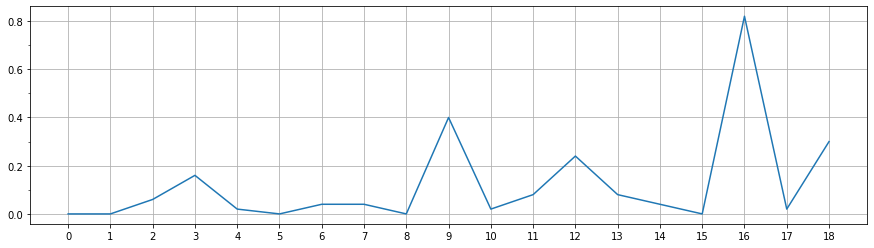

In [107]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
fig, ax = plt.subplots(1, 1, figsize=(15,4))
ax.plot(np.arange(0,d),freq)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax.grid(which='major')

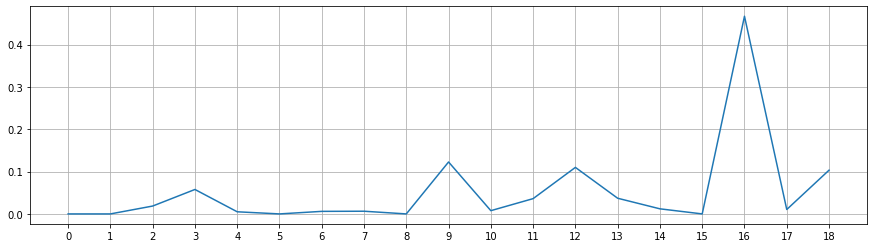

In [108]:
av_fractions=np.sum(opt_portf,axis=0)/n_experiments
fig, ax = plt.subplots(1, 1, figsize=(15,4))
plt.plot(np.arange(0,d),av_fractions)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax.grid(which='major')

In [183]:
#alphas=[0.001,0.01,0.1,0.2,0.3,0.5,0.75,0.9,1]
#alphas=[0.001]
alphas=[0.01]
N_artif=11178
n_alphas=len(alphas)
n_experiments=5
opt_portf_al=np.zeros((n_experiments,d))
opt_val_al=np.zeros(n_experiments)
opt_portf_all=np.zeros((n_alphas,n_experiments,d))
X_all=np.zeros((n_alphas,n_experiments))
r_artif_rel=np.zeros((N_artif,d))
al=-1
X=np.ones(n_experiments)
for alpha in alphas:
    al=al+1
    X=np.ones(n_experiments)
    for s in range(n_experiments):
        X[s]=1
        np.random.seed(1+s)
        r_artif=np.exp(np.random.multivariate_normal(mu,cov,N_artif))
        # relative utility
        for t in range(N_artif):
            r_artif_rel[t,:]=r_artif[t,:]/np.max(r_artif[t,:])
        print(al,s)
        opt_portf_al[s,:], opt_val_al[s]  = optimal_portfolio_SEG_unif(U,r_artif_rel,threshold=1/10**10)
        opt_num, not_opt_num, w = refine(opt_portf_al[s,:])
        for t in range(N_artif):
            X[s]=X[s]*np.dot(w,r_artif[t,opt_num])
        X_all[al,s]=X[s]
    opt_portf_all[al,:,:]=opt_portf_al    

0 0
0 1
0 2
0 3
0 4


In [180]:
print(opt_num)

[16]


In [181]:
X_all

array([[12625.40709612,  5394.61081125,  1005.05064376,  3522.27642009,
         5816.91131876]])

In [182]:
for k in range(n_experiments):
    opt_num, not_opt_num, w = refine(opt_portf_all[0,k,:])
    print('k:',k,opt_num,100*w)

k: 0 [16] [100.]
k: 1 [16] [100.]
k: 2 [18] [100.]
k: 3 [9] [100.]
k: 4 [16] [100.]


In [168]:
al=-1
for alpha in alphas:
    al=al+1
    z=X_all[al,:]
    print(z)
    print(stats.describe(z))

[1.42048281e-124 7.53185217e-125 1.32651511e-124 1.43147678e-125
 1.39948466e-125]
DescribeResult(nobs=5, minmax=(1.3994846619339702e-125, 1.4204828110026967e-124), mean=7.566558570561753e-125, variance=3.8053453317490345e-249, skewness=nan, kurtosis=nan)


D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1087: RuntimeWarning: invalid value encountered in true_divide
  lambda m2, m3: m3 / m2**1.5,


In [169]:
X=np.ones(n_experiments)
for s in range(n_experiments):
    for t in range(N_artif):
#    X[s]=X[s]*np.dot(w,r_artif[t,opt_num])
        X[s]=X[s]*np.dot(opt_portf_all[0,s,:],r_artif[t,:]) 
X

array([1.39943952e-125, 1.39945342e-125, 5.11507562e-126, 3.12278912e-127,
       1.39945963e-125])

In [53]:
freq_all=np.zeros((n_alphas,d))
for al in range(n_alphas):
    opt_portf_al=opt_portf_all[al,:,:]
    freq_all[al,:]=np.sum(opt_portf_al>0.001,axis=0)/n_experiments
print(freq_all)
freq_all.shape

[[0.6 0.4 1.  0.8 0.6 0.4 0.1 0.6 0.1 0.7 0.3 0.5 0.6 0.2 0.9 0.4 1.  0.8
  0.6]]


(1, 19)

In [54]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
fig, ax = plt.subplots(1, 1, figsize=(15,4))
ax.plot(np.arange(0,d),freq_all[2,:])
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax.grid(which='major')

IndexError: index 2 is out of bounds for axis 0 with size 1

In [ ]:
stats.describe(opt_val_al)

In [ ]:
np.sum(opt_portf_al>0.001,axis=0)/n_experiments

In [ ]:
av_fractions_al=np.sum(opt_portf_al,axis=0)/n_experiments
plt.plot(np.arange(0,d),av_fractions_al)

In [ ]:
 100*opt_portf_al

In [ ]:
for s in range(n_experiments):
    opt_num, not_opt_num, w = refine(opt_portf_al[s,:])
    #print(opt_val_al[s],opt_num,w)  
    #X=1
    #Y=1
    for t in range(N_artif):
        X[s]=X[s]*np.dot(w,r_artif[t,opt_num])
    #   Y[s]=Y[s]*np.dot(opt_portf[s,:],r_artif[t,:])        
    print('X',X[s])

In [207]:
 X_all_ucbal.mean()

886.8111999943595

In [208]:
np.median(X_all_ucbal)

509.0318908200254

In [209]:
print(X_all_ucbal.min(),X_all_ucbal.max(),X_all_ucbal.var())

16.875746118696288 21968.850011879487 1955811.1852915802


NameError: name 'np' is not defined